# Import tools

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC


## Read Data

In [19]:
df = pd.read_csv('../day6/data/titanic.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# Check information of data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [21]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

# Data Cleansing

In [22]:
df.fillna(df.mean(), inplace=True)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [23]:
df = df.loc[:, ~df.columns.str.contains('zero')]
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [24]:
df.rename(columns={'2urvived': 'Survive'}, inplace=True)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survive
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [25]:
correlation_matrix = df.corr()
correlation_matrix

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survive
Passengerid,1.000000,0.025799,0.031128,-0.013406,-0.055224,0.008942,-0.038354,-0.051465,-0.331493
Age,0.025799,1.000000,0.178182,-0.053663,-0.189972,-0.125851,-0.377908,-0.064956,-0.055862
Fare,0.031128,0.178182,1.000000,0.185681,0.160349,0.221635,-0.558683,-0.239062,0.173786
Sex,-0.013406,-0.053663,0.185681,1.000000,0.109609,0.213125,-0.124617,-0.099270,0.404020
sibsp,-0.055224,-0.189972,0.160349,0.109609,1.000000,0.373587,0.060832,0.066043,-0.014375
Parch,0.008942,-0.125851,0.221635,0.213125,0.373587,1.000000,0.018322,0.045209,0.054908
Pclass,-0.038354,-0.377908,-0.558683,-0.124617,0.060832,0.018322,1.000000,0.187006,-0.244686
Embarked,-0.051465,-0.064956,-0.239062,-0.099270,0.066043,0.045209,0.187006,1.000000,-0.093023
Survive,-0.331493,-0.055862,0.173786,0.404020,-0.014375,0.054908,-0.244686,-0.093023,1.000000


## Check Distinct values

In [26]:
df.nunique()

Passengerid    1309
Age              98
Fare            281
Sex               2
sibsp             7
Parch             8
Pclass            3
Embarked          4
Survive           2
dtype: int64

# Data Scaling

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline
scaling_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Fit and transform the data
scaled_df = scaling_pipeline.fit_transform(df.drop(columns=['Survive']))

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns.drop('Survive'))
scaled_df['Survive'] = df['Survive'].values

scaled_df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survive
0,-1.730728,-0.581628,-0.503291,-0.743497,0.481288,-0.445,0.841916,0.623416,0
1,-1.728082,0.658652,0.734744,1.344995,0.481288,-0.445,-1.546098,-1.834518,1
2,-1.725435,-0.271558,-0.490240,1.344995,-0.479087,-0.445,0.841916,0.623416,1
3,-1.722789,0.426099,0.383183,1.344995,0.481288,-0.445,-1.546098,0.623416,1
4,-1.720143,0.426099,-0.487824,-0.743497,-0.479087,-0.445,0.841916,0.623416,0


## Split

In [28]:
X = scaled_df.drop(columns=['Survive'])
y = scaled_df['Survive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1047, 8)
X_test shape: (262, 8)
y_train shape: (1047,)
y_test shape: (262,)


# Classification model

## Hyper parmeter tuning

In [29]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1,50,2)}
knn_grid = GridSearchCV(knn, knn_params)
knn_grid.fit(X_train, y_train) 
print('KNN best params:', knn_grid.best_params_)
print('KNN best score:', knn_grid.best_score_)
forest = RandomForestClassifier(random_state=0)
forest_params = {'n_estimators': range(10,100,5),
                 'criterion': ['gini', 'entropy'],}
forest_grid = GridSearchCV(forest, forest_params)
forest_grid.fit(X_train, y_train)
print('RandomForest best params:', forest_grid.best_params_)
print('RandomForest best score:', forest_grid.best_score_)
svm = SVC()
svm_params = [{'kernel': ['linear'], 'C': [0.1, 1, 5, 10, 50,100]},
              {'kernel': ['rbf'], 'C': [0.1, 1, 5, 10, 50,100], 'gamma': range(1,10)},
              {'kernel': ['poly'], 'C': [0.1, 1, 5, 10, 50,100], 'degree': range(1,10)}]
svm_grid = GridSearchCV(svm, svm_params)
svm_grid.fit(X_train, y_train)
print('SVM best params:', svm_grid.best_params_)
print('SVM best score:', svm_grid.best_score_)
# kmeans = KMeans()
# kmeans_params = {'n_clusters': range(1, 10)}
# kmeans_grid = GridSearchCV(kmeans, kmeans_params)
# kmeans_grid.fit(X_train, y_train)
# print('KMeans best params:', kmeans_grid.best_params_)
# print('KMeans best score:', kmeans_grid.best_score_)

KNN best params: {'n_neighbors': 9}
KNN best score: 0.8462428799270905
RandomForest best params: {'criterion': 'gini', 'n_estimators': 75}
RandomForest best score: 0.8815538847117793
SVM best params: {'C': 50, 'degree': 2, 'kernel': 'poly'}
SVM best score: 0.8500432900432899
KMeans best params: {'n_clusters': 9}
KMeans best score: -738.0651782547678


In [30]:
baseline_knn_pred = knn_grid.predict(X_test)

baseline_forest_pred = forest_grid.predict(X_test)

baseline_svm_pred = svm_grid.predict(X_test)

# Model Ensemble

In [31]:
from sklearn.ensemble import StackingClassifier

# Define the base models with their best parameters
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors'])),
    ('forest', RandomForestClassifier(**forest_grid.best_params_, random_state=0)),
    ('svm', SVC(**svm_grid.best_params_))
]

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(random_state=0)
)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Stacking Classifier Accuracy: 0.8702290076335878
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       189
           1       0.75      0.79      0.77        73

    accuracy                           0.87       262
   macro avg       0.84      0.85      0.84       262
weighted avg       0.87      0.87      0.87       262



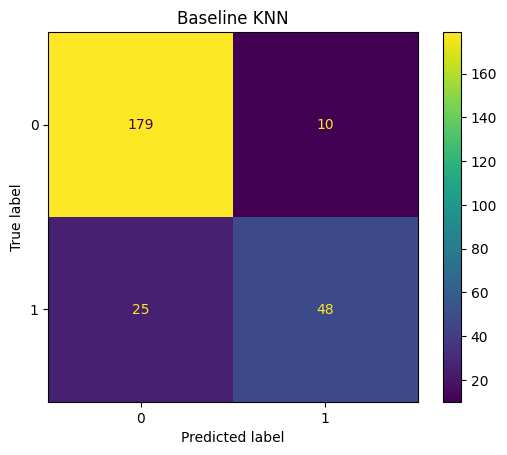

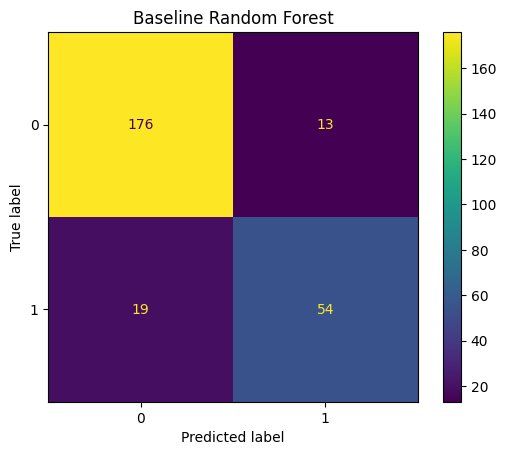

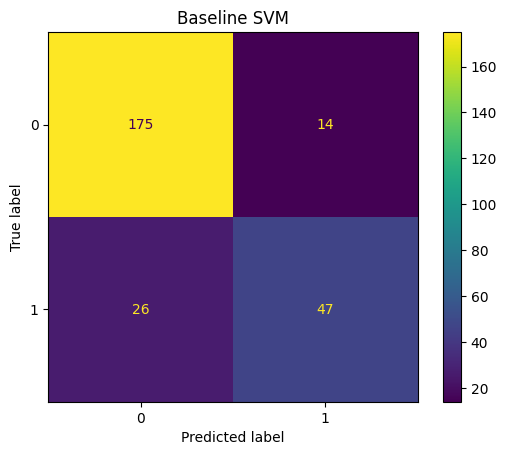

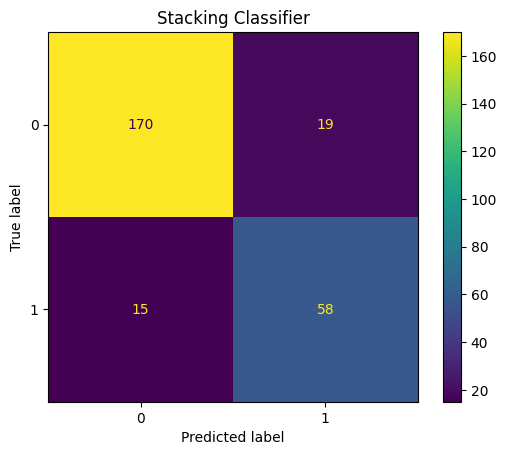

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cfmx = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cfmx, display_labels=[0, 1])
    disp.plot()
    plt.title(title)
    plt.show()

# Plot confusion matrix for baseline KNN
plot_confusion_matrix(y_test, baseline_knn_pred, "Baseline KNN")

# Plot confusion matrix for baseline Random Forest
plot_confusion_matrix(y_test, baseline_forest_pred, "Baseline Random Forest")

# Plot confusion matrix for baseline SVM
plot_confusion_matrix(y_test, baseline_svm_pred, "Baseline SVM")

# Plot confusion matrix for Stacking Classifier
plot_confusion_matrix(y_test, y_pred, "Stacking Classifier")

## Conclusion
According to the dataset each feature has barely information to correctly tell that passenger will servive. From this reason I decided to implemented with 3 above models in stacking ensemble
1. KNN model has a potential to locate unsurvive passenger with its algorithm
2. RandomForest model has a potential to predict survive people with its conditional like algorithm with decision tree
3. SVM model is used to support previous model which might contain some mistakes.
* Lastly Stacking all of them to integrate all model prediction to reduce other model weakness since the dataset has only 2 classes.